(Ablation study on active learning)
### RQ: boundary points still lie in boundaries after dimension reduction?
1. without boundary preserving property
2. with boundary preserving property
3. add boundary points to train decoder(reconstruction)
4. with customize reconstruction loss(to focus on important dims)

Verify
- adversarial border points lying on boundaries?
- true samples from training dataset
- true samples from testing dataset

Evaluation
- reconstruction error
- top1-top2 difference
- properties for DVI
- efficiency (time for training)

In [1]:
# import modules
from deepvisualinsight.MMS import MMS
import sys
import os
import numpy as np

In [2]:
# hyperparameters
EPOCH = 100

1. without boundary preserving properties
train data->parametric umap

In [19]:
content_path = "E:\\DVI_exp_data\\RQ1\\withoutB"
sys.path.append(content_path)

from Model.model import *
net = resnet18()
classes = ("airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")
mms = MMS(content_path, net, 100, 100, 1, 512, 10, classes, cmap="tab10", resolution=400, neurons=256,
          verbose=1, temporal=False, split=-1, advance_border_gen=True, withoutB=True, attack_device="cuda:0")


Finish loading content!


In [33]:
mms.save_evaluation()

Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000187858FD278>
Mon Jul 12 19:40:11 2021 Building RP forest with 16 trees
Mon Jul 12 19:40:13 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Mon Jul 12 19:40:24 2021 Building RP forest with 16 trees
Mon Jul 12 19:40:24 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000187859FA898>
Mon Jul 12 19:40:26 2021 Building RP forest with 17 trees
Mon Jul 12 19:40:27 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Mon Jul 12 19:40:28 2021 Building RP forest with 17 trees
Mon Jul 12 19:40:28 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Keras encoder mo

100%|██████████| 250/250 [00:00<00:00, 6963.03it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001879B5ACF28>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000187B508AF98>


100%|██████████| 50/50 [00:00<00:00, 5586.15it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001878290A6A0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001878F644208>


100%|██████████| 250/250 [00:00<00:00, 5971.93it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000187964DE240>


  0%|          | 0/50 [00:00<?, ?it/s]

Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001879B646F60>


100%|██████████| 50/50 [00:00<00:00, 6264.83it/s]


finish inv eval for Epoch 100


100%|██████████| 50/50 [00:00<00:00, 5570.57it/s]

finish subject model eval for Epoch 100
Average evaluation time for 1 epoch is 166.09 seconds


In [20]:
# 1. whether adversarial border points lying on boundaries?
# quantitative measure
border_points = mms.get_epoch_border_centers(EPOCH)
preds = mms.get_pred(EPOCH, border_points)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 25/25 [00:00<00:00, 6266.89it/s]


5000

In [20]:
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = border_points[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.7] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.7] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.7] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001878EAAD198>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000187BE69FCF8>


100%|██████████| 800/800 [00:00<00:00, 6122.86it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000187845150B8>


(4333, 5000, 0.8666)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1018: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C0B646E278>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C0B64407B8>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C0F5CB2C88>


100%|██████████| 800/800 [00:00<00:00, 6123.22it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C0B6440DD8>


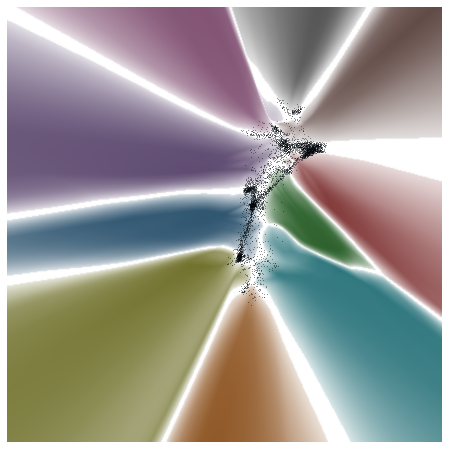

In [24]:
# visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, target_samples, None, None, None,
                        os.path.join(img_save_location, "RQ_11_{:d}".format(EPOCH)), np.arange(-len(c), 0, 1))

In [21]:
#2. true samples on boundaries
training_data = mms.training_data
train_data = mms.get_representation_data(EPOCH, training_data)

preds = mms.get_pred(EPOCH, train_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 250/250 [00:00<00:00, 5697.05it/s]


3051

In [22]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = train_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.7] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.7] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.7] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001879B81BE48>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001878F555438>


100%|██████████| 800/800 [00:00<00:00, 5531.82it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001878F6970B8>


(2856, 3051, 0.9360865290068829)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1018: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C0C0C01DD8>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C10182E0F0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C0C0C01DD8>


100%|██████████| 800/800 [00:00<00:00, 6032.34it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C101826A20>


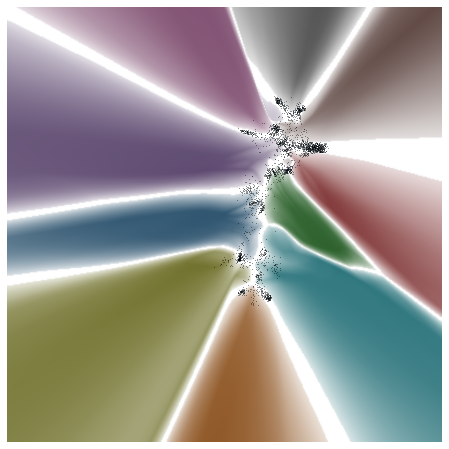

In [8]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, train_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_12_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [15]:
# 3. test data
test_data = mms.get_epoch_test_repr_data(EPOCH)

preds = mms.get_pred(EPOCH, test_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 50/50 [00:00<00:00, 5026.37it/s]


652

In [16]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = test_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000023F4CC1D198>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000023F107BB2E8>


100%|██████████| 800/800 [00:00<00:00, 5899.17it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000023F45718630>


(522, 652, 0.8006134969325154)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1015: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000023F87EAD198>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000023F87EA8748>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000023FAF72F7F0>


100%|██████████| 800/800 [00:00<00:00, 5941.18it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000023F87EA8908>


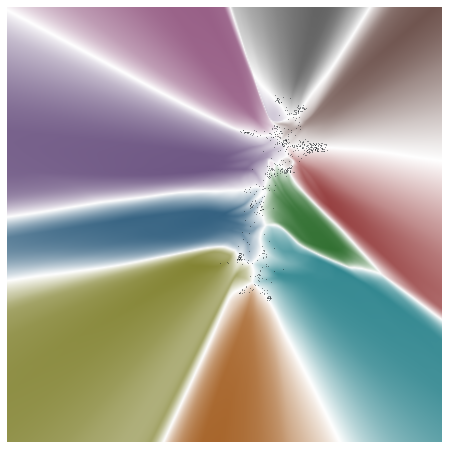

In [17]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, test_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_13_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [ ]:
# recon error
# target_samples = train_data[border]
target_samples = border_points
repr_2d = mms.batch_project(target_samples, EPOCH)
recon1 = mms.batch_inverse(repr_2d, EPOCH)

In [ ]:
# conf diff
target_samples = border_points
ori_pred = mms.get_pred(EPOCH, target_samples)
sorted_ori_pred = np.sort(ori_pred, axis=1)
ori_pred1 = sorted_ori_pred[:,-1]-sorted_ori_pred[:,-2]
ori_pred1 = ori_pred1 / (sorted_ori_pred[:, -1] - sorted_ori_pred[:, 0])

repr_2d = mms.batch_project(target_samples, EPOCH)
recon = mms.batch_inverse(repr_2d, EPOCH)
recon_pred = mms.get_pred(EPOCH, recon)
sorted_recon_pred = np.sort(recon_pred, axis=1)
recon_pred1 = sorted_recon_pred[:,-1]-sorted_recon_pred[:,-2]
recon_pred1 = recon_pred1 / (sorted_recon_pred[:, -1] - sorted_recon_pred[:, 0])

In [23]:
sys.path.remove(content_path)

2. with boundary preserving properties

In [2]:
content_path = "E:\\DVI_exp_data\\resnet18_cifar10"
sys.path.append(content_path)

from Model.model import *
net = resnet18()
classes = ("airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

mms = MMS(content_path, net, 100, 100, 1, 512, 10, classes, cmap="tab10", resolution=400, neurons=256,
          verbose=1, temporal=False, split=-1, advance_border_gen=True, attack_device="cuda:0")


Finish loading content!


In [6]:
# 1. whether adversarial border points lying on boundaries?
# quantitative measure
border_points = mms.get_epoch_border_centers(EPOCH)
preds = mms.get_pred(EPOCH, border_points)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 25/25 [00:00<00:00, 6308.36it/s]


1596

In [9]:
preds = mms.get_pred(EPOCH,border_points[border])
preds = np.argmax(preds,axis=1)
preds = np.squeeze(preds)
np.bincount(preds)

100%|██████████| 8/8 [00:00<00:00, 4010.33it/s]


array([296,  16,  51, 396, 137, 417,  52,  34, 179,  18], dtype=int64)

In [63]:
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = border_points[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015499A0E630>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001554BCD87B8>


100%|██████████| 800/800 [00:00<00:00, 5241.99it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015567AB1CF8>


(1139, 1596, 0.7136591478696742)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001557955C518>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000155795656A0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000154989EF780>


100%|██████████| 800/800 [00:00<00:00, 5610.28it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001549893F6D8>


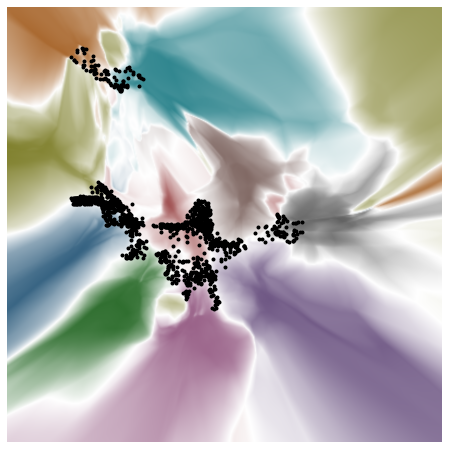

In [64]:
# visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, target_samples, None, None, None,
                        os.path.join(img_save_location, "RQ_21_{:d}".format(EPOCH)), np.arange(-len(c), 0, 1))

In [65]:
#2. true samples on boundaries

training_data = mms.training_data
train_data = mms.get_representation_data(EPOCH, training_data)

preds = mms.get_pred(EPOCH, train_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 250/250 [00:00<00:00, 4246.33it/s]


3051

In [66]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = train_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015498FE2EB8>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015499775F60>


100%|██████████| 800/800 [00:00<00:00, 5495.04it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001549903A7B8>


(2300, 3051, 0.7538511963290724)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548F2C5390>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548DDE2C18>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015498A6B6A0>


100%|██████████| 800/800 [00:00<00:00, 5571.64it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548F25C550>


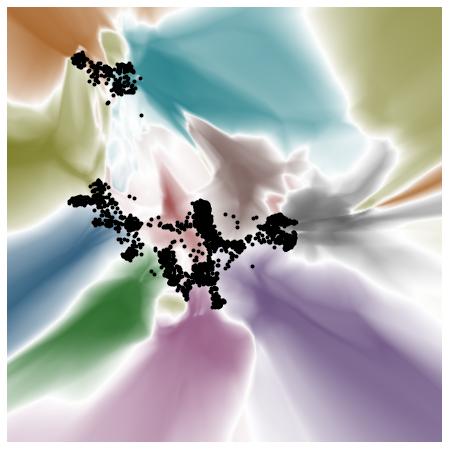

In [67]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, train_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_22_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [68]:
# 3. test data
test_data = mms.get_epoch_test_repr_data(EPOCH)

preds = mms.get_pred(EPOCH, test_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 50/50 [00:00<00:00, 5569.98it/s]


652

In [69]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = test_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015584A00CF8>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015499AEA160>


100%|██████████| 800/800 [00:00<00:00, 4983.36it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015584A00390>


(493, 652, 0.7561349693251533)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548F65BC50>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548F65BDA0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015585277E80>


100%|██████████| 800/800 [00:00<00:00, 5312.72it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548F65B898>


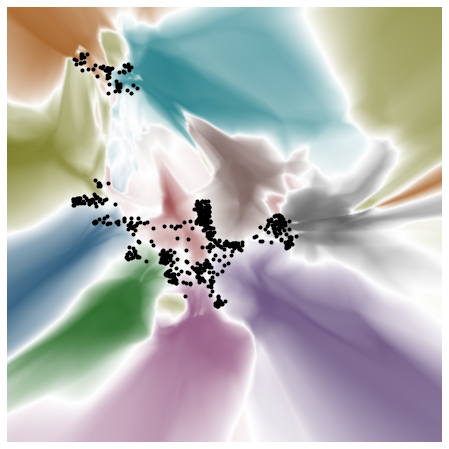

In [70]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, test_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_23_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [71]:
sys.path.remove(content_path)

3. with boundary preserving properties, add B as reconstruction

In [72]:
content_path = "E:\\DVI_exp_data\\RQ1\\B_Recon"
sys.path.append(content_path)

from Model.model import *
net = resnet18()
classes = ("airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

mms = MMS(content_path, net, 100, 100, 1, 512, 10, classes, cmap="tab10", resolution=400, neurons=256,
          verbose=1, temporal=False, split=-1, advance_border_gen=True, attack_device="cuda:0")

Finish loading content!


In [74]:
# 1. whether adversarial border points lying on boundaries?
# quantitative measure
border_points = mms.get_epoch_border_centers(EPOCH)
preds = mms.get_pred(EPOCH, border_points)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 25/25 [00:00<00:00, 6267.26it/s]


1596

In [75]:
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = border_points[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015490BF02B0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000155BC269400>


100%|██████████| 800/800 [00:00<00:00, 5242.74it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015490BC4588>


(1197, 1596, 0.75)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000155BC2587F0>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548C8B3240>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001549901FC18>


100%|██████████| 800/800 [00:00<00:00, 5209.39it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015490BC4048>


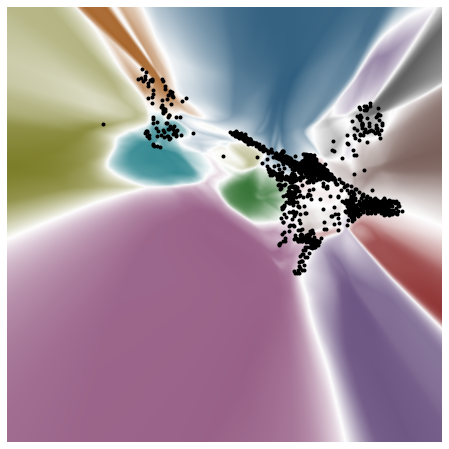

In [76]:
# visualize
img_save_location = os.path.join(mms.content_path, "img")
if not os.path.exists(img_save_location):
    os.mkdir(img_save_location)

mms.customize_visualize(EPOCH, target_samples, None, None, None,
                        os.path.join(img_save_location, "RQ_31_{:d}".format(EPOCH)), np.arange(-len(c), 0, 1))


In [77]:
#2. true samples on boundaries

training_data = mms.training_data
train_data = mms.get_representation_data(EPOCH, training_data)

preds = mms.get_pred(EPOCH, train_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 250/250 [00:00<00:00, 4109.26it/s]


3051

In [78]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = train_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001558480FAC8>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015584796470>


100%|██████████| 800/800 [00:00<00:00, 5277.25it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015584776DA0>


(2269, 3051, 0.7436905932481154)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001554E9B0160>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001554E9A8710>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000155A629A438>


100%|██████████| 800/800 [00:00<00:00, 5384.03it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001554E9A8F60>


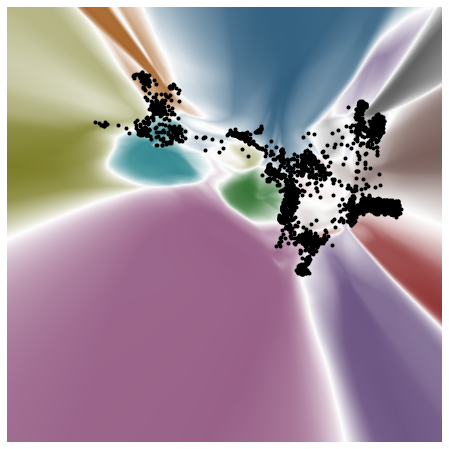

In [79]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, train_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_32_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [80]:
# 3. test data

test_data = mms.get_epoch_test_repr_data(EPOCH)

preds = mms.get_pred(EPOCH, test_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 50/50 [00:00<00:00, 5570.42it/s]


652

In [81]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = test_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001548F5E1358>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001554B118748>


100%|██████████| 800/800 [00:00<00:00, 5457.64it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000154999B19B0>


(485, 652, 0.7438650306748467)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1000: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001549912B0F0>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015499138550>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000155B2FCC908>


100%|██████████| 800/800 [00:00<00:00, 5278.09it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000015498B46080>


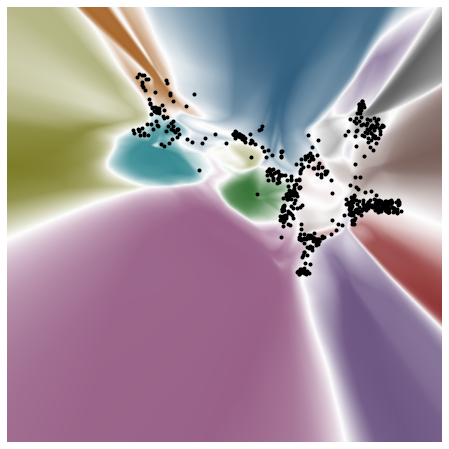

In [82]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, test_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_33_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [9]:
sys.path.remove(content_path)

4. B+recon, with fixed borders

In [6]:
content_path = "E:\\DVI_exp_data\\RQ1\\test"
sys.path.append(content_path)

from Model.model import *
net = resnet18()
classes = ("airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

mms = MMS(content_path, net, 100, 100, 1, 512, 10, classes, cmap="tab10", resolution=400, neurons=256,
          verbose=1, temporal=False, split=-1, advance_border_gen=True, attack_device="cuda:0")

Finish loading content!


In [37]:
mms.save_evaluation()

Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001878314CE48>
Mon Jul 12 19:45:58 2021 Building RP forest with 16 trees
Mon Jul 12 19:45:59 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Mon Jul 12 19:46:00 2021 Building RP forest with 16 trees
Mon Jul 12 19:46:00 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000018782C6B470>
Mon Jul 12 19:46:02 2021 Building RP forest with 17 trees
Mon Jul 12 19:46:03 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Mon Jul 12 19:46:04 2021 Building RP forest with 17 trees
Mon Jul 12 19:46:05 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Keras encoder mo

100%|██████████| 250/250 [00:00<00:00, 6962.79it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000187830E4CC0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000018785CC4F98>


100%|██████████| 50/50 [00:00<00:00, 5563.03it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001879B6466A0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001879B04BEB8>


100%|██████████| 250/250 [00:00<00:00, 5825.10it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001879688CD68>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000018785CCF0B8>


100%|██████████| 50/50 [00:00<00:00, 5543.62it/s]


finish inv eval for Epoch 100


100%|██████████| 50/50 [00:00<00:00, 6266.89it/s]

finish subject model eval for Epoch 100
Average evaluation time for 1 epoch is 155.73 seconds


In [7]:
# 1. whether adversarial border points lying on boundaries?
# quantitative measure
border_points = mms.get_epoch_border_centers(EPOCH)
preds = mms.get_pred(EPOCH, border_points)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 25/25 [00:00<00:00, 92.49it/s]


5000

In [8]:
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = border_points[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.8] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.8] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.8] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002D4A504E978>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002D4A712B278>
Instructions for updating:
Use tf.identity instead.


100%|██████████| 800/800 [00:00<00:00, 6075.28it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002D4A4E36AC8>


(3584, 5000, 0.7168)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1018: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C0B66E5B00>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C0B66EF240>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C0B7A5DE80>


100%|██████████| 800/800 [00:00<00:00, 5985.26it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C0B66E5E10>


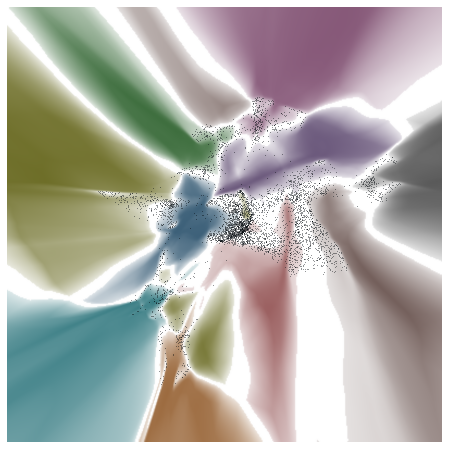

In [32]:
# visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, target_samples, None, None, None,
                        os.path.join(img_save_location, "RQ_41_{:d}".format(EPOCH)), np.arange(-len(c), 0, 1))

In [28]:
#2. true samples on boundaries

training_data = mms.training_data
train_data = mms.get_representation_data(EPOCH, training_data)

preds = mms.get_pred(EPOCH, train_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 250/250 [00:00<00:00, 6266.81it/s]


3051

In [29]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = train_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.7] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.7] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.7] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001878590FD68>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000187C3CEBEB8>


100%|██████████| 800/800 [00:00<00:00, 5941.79it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001878F66AE80>


(2645, 3051, 0.8669288757784332)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1018: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C0CE934BA8>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C0CEA56CC0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C0FC0845F8>


100%|██████████| 800/800 [00:00<00:00, 5898.07it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001C0CEA569B0>


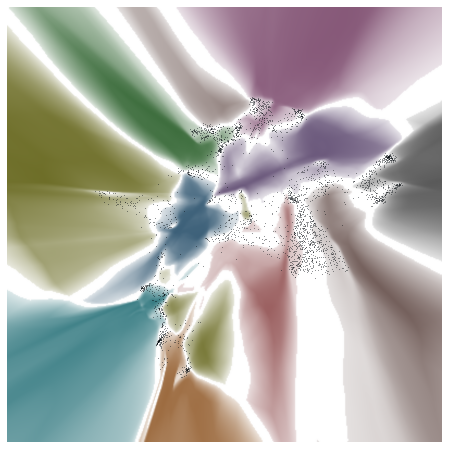

In [35]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, train_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_42_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [18]:
# 3. test data

test_data = mms.get_epoch_test_repr_data(EPOCH)

preds = mms.get_pred(EPOCH, test_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 50/50 [00:00<00:00, 6267.83it/s]


652

In [19]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = test_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.85] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.85] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.85] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000022EFBC8ABE0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000022EC17C3DA0>


100%|██████████| 800/800 [00:00<00:00, 5897.01it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000022EC1778E48>


(339, 652, 0.5199386503067485)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1015: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000023FB34A75C0>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000023F16B1A4A8>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000023F44DD0748>


100%|██████████| 800/800 [00:00<00:00, 5812.60it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000023F16B1F550>


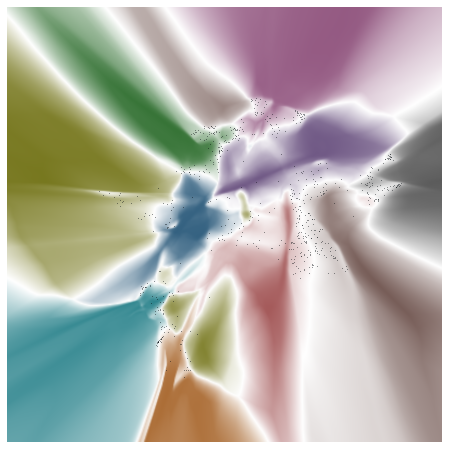

In [31]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, test_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_43_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [ ]:
# target_samples = train_data[border]
target_samples = border_points
repr_2d = mms.batch_project(target_samples, EPOCH)
recon2 = mms.batch_inverse(repr_2d, EPOCH)

In [ ]:
# target_samples = train_data[border]
target_samples = border_points
ori_pred = mms.get_pred(EPOCH, target_samples)
sorted_ori_pred = np.sort(ori_pred, axis=1)
ori_pred2 = sorted_ori_pred[:,-1]-sorted_ori_pred[:,-2]
ori_pred2 = ori_pred2 / (sorted_ori_pred[:, -1]-sorted_ori_pred[:, 0])

repr_2d = mms.batch_project(target_samples, EPOCH)
recon = mms.batch_inverse(repr_2d, EPOCH)
recon_pred = mms.get_pred(EPOCH, recon)
sorted_recon_pred = np.sort(recon_pred, axis=1)
recon_pred2 = sorted_recon_pred[:,-1]-sorted_recon_pred[:,-2]
recon_pred2 = recon_pred2 /( sorted_recon_pred[:,-1]-sorted_recon_pred[:,0])

In [9]:
sys.path.remove(content_path)

5. with coefficient

In [7]:
content_path = "E:\\DVI_exp_data\\resnet18_cifar10"
sys.path.append(content_path)

from Model.model import *
net = resnet18()
classes = ("airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

mms = MMS(content_path, net, 100, 100, 1, 512, 10, classes, cmap="tab10", resolution=400, neurons=256,
           verbose=1, temporal=False, split=-1, advance_border_gen=True, attack_device="cuda:0")

Finish loading content!


In [8]:
# hyperparameters
EPOCH = 100

In [6]:
mms.save_evaluation()

Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000238ECAFCB00>
Thu Jul 15 01:02:47 2021 Building RP forest with 16 trees
Thu Jul 15 01:02:49 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Jul 15 01:03:00 2021 Building RP forest with 16 trees
Thu Jul 15 01:03:00 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000238E9EA8F28>
Thu Jul 15 01:03:02 2021 Building RP forest with 17 trees
Thu Jul 15 01:03:03 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Thu Jul 15 01:03:05 2021 Building RP forest with 17 trees
Thu Jul 15 01:03:05 2021 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	Stopping threshold met -- exiting after 2 iterations
Keras encoder mo

100%|██████████| 250/250 [00:00<00:00, 5449.36it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000023925A09240>


100%|██████████| 50/50 [00:00<00:00, 5570.57it/s]

Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000238E6D3D6D8>



100%|██████████| 50/50 [00:00<00:00, 5556.69it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000238E8BBAC18>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000238E8AE8DD8>


100%|██████████| 250/250 [00:00<00:00, 5696.58it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000238ECB13BE0>


100%|██████████| 50/50 [00:00<00:00, 5014.71it/s]

Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000238E8BDB278>



100%|██████████| 50/50 [00:00<00:00, 5013.39it/s]


finish inv eval for Epoch 100


100%|██████████| 50/50 [00:00<00:00, 6266.89it/s]

finish subject model eval for Epoch 100
Average evaluation time for 1 epoch is 162.86 seconds


In [9]:
# 1. whether adversarial border points lying on boundaries?
# quantitative measure
border_points = mms.get_epoch_border_centers(EPOCH)
preds = mms.get_pred(EPOCH, border_points)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 25/25 [00:00<00:00, 108.53it/s]


5000

In [10]:
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=100)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = border_points[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.8] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.8] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.8] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001CAEEB20C50>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001CAEFC59AC8>
Instructions for updating:
Use tf.identity instead.


100%|██████████| 50/50 [00:00<00:00, 5572.94it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001CAEEB310B8>


(4569, 5000, 0.9138)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1029: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001CAB67862E8>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001CABA709E10>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001CAFA4253C8>


100%|██████████| 800/800 [00:00<00:00, 5941.79it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001CAB6781D68>


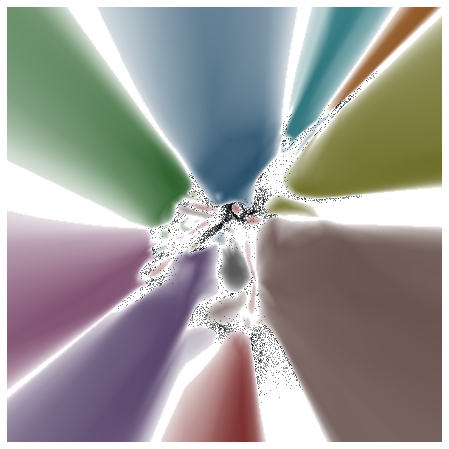

In [11]:
# visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, target_samples, None, None, None,
                        os.path.join(img_save_location, "RQ_41_{:d}".format(EPOCH)), np.arange(-len(c), 0, 1))

In [12]:
#2. true samples on boundaries

training_data = mms.training_data
train_data = mms.get_representation_data(EPOCH, training_data)

preds = mms.get_pred(EPOCH, train_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 250/250 [00:00<00:00, 5693.71it/s]


3051

In [13]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = train_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.8] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.8] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.8] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001CABA72ACC0>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001CAEFD0D6D8>


100%|██████████| 800/800 [00:00<00:00, 5419.33it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001CABA737860>


(2926, 3051, 0.9590298262864635)

In [15]:
# target_samples = train_data[border]
target_samples = border_points
repr_2d = mms.batch_project(target_samples, EPOCH)
recon2 = mms.batch_inverse(repr_2d, EPOCH)

Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000020552A19470>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000020554770390>


In [16]:
# target_samples = train_data[border]
target_samples = border_points
ori_pred = mms.get_pred(EPOCH, target_samples)
sorted_ori_pred = np.sort(ori_pred, axis=1)
ori_pred2 = sorted_ori_pred[:,-1]-sorted_ori_pred[:,-2]
repr_2d = mms.batch_project(target_samples, EPOCH)
recon = mms.batch_inverse(repr_2d, EPOCH)
recon_pred = mms.get_pred(EPOCH, recon)
sorted_recon_pred = np.sort(recon_pred, axis=1)
recon_pred2 = sorted_recon_pred[:,-1]-sorted_recon_pred[:,-2]

100%|██████████| 25/25 [00:00<00:00, 6266.14it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002059ADC6438>


100%|██████████| 25/25 [00:00<00:00, 4197.49it/s]

Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002059ADDFE48>


E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1019: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000293F2563780>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002944BE3B240>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002940175DB00>


100%|██████████| 800/800 [00:00<00:00, 6032.29it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002944BE6AB00>


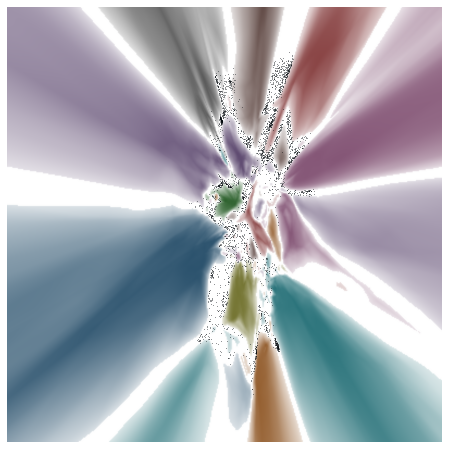

In [10]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, train_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_42_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [11]:
# 3. test data

test_data = mms.get_epoch_test_repr_data(EPOCH)

preds = mms.get_pred(EPOCH, test_data)
preds = preds + 1e-8

sort_preds = np.sort(preds)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])

border = np.zeros(len(diff), dtype=np.bool)
border[diff < 0.1] = 1
s = np.sum(border)
s

100%|██████████| 50/50 [00:00<00:00, 5541.13it/s]


652

In [12]:
# 2. if point lies on boundary, is the background white?
grid_view, decision_view =mms.get_epoch_decision_view(EPOCH, resolution=400)
grid_view = grid_view.reshape(-1, 2)
decision_view = decision_view.reshape(-1,3)
from sklearn.neighbors import NearestNeighbors
nbs = NearestNeighbors(n_neighbors=1, algorithm="ball_tree").fit(grid_view)

target_samples = test_data[border]
repr_2d = mms.batch_project(target_samples, EPOCH)
_, indices = nbs.kneighbors(repr_2d)
indices = indices.squeeze()
sample_colors = decision_view[indices]

c1 = np.zeros(indices.shape[0], dtype=np.bool)
c1[sample_colors[:,0]>0.8] = 1

c2 = np.zeros(indices.shape[0], dtype=np.bool)
c2[sample_colors[:,1]>0.8] = 1

c3 = np.zeros(indices.shape[0], dtype=np.bool)
c3[sample_colors[:,2]>0.8] = 1
c = np.logical_and(c1,c2)
c=np.logical_and(c, c3)

np.sum(c), len(c), np.sum(c)/len(c)

Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000029457F626D8>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000293F2387EF0>


100%|██████████| 800/800 [00:00<00:00, 6124.88it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000029457F62898>


(621, 652, 0.9524539877300614)

E:\xianglin\git_space\DeepVisualInsight\deepvisualinsight\MMS.py:1019: MatplotlibDeprecationWarning: Setting the line's pick radius via set_picker is deprecated since 3.3 and will be removed two minor releases later; use set_pickradius instead.
  color=color, zorder=2, picker=mpl.rcParams['lines.markersize'])


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x00000294584E3470>
Computing decision regions ...
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000029440C372E8>
Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000029418231198>


100%|██████████| 800/800 [00:00<00:00, 5728.51it/s]


Keras encoder model loaded from <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000029440C374E0>


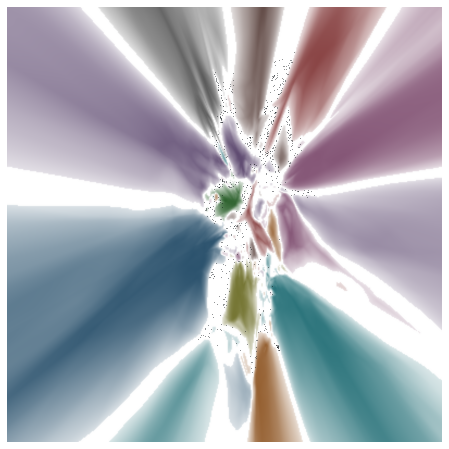

In [13]:
#visualize
img_save_location = os.path.join(mms.content_path, "img")

mms.customize_visualize(EPOCH, test_data[border], None, None, None,
                        os.path.join(img_save_location, "RQ_43_{:d}".format(EPOCH)), np.arange(-s, 0, 1))

In [6]:
sys.path.remove(content_path)

compare reconstruction error and top1/top2 difference

In [26]:
recon_error_1 = np.linalg.norm(border_points-recon1, axis=1)
recon_error_2 = np.linalg.norm(border_points-recon2, axis=1)
selected_idxs = np.argwhere(recon_error_1<recon_error_2)

Evaluation

In [27]:
diff_1 = ori_pred1 - recon_pred1
diff_2 = ori_pred2 - recon_pred2
selected_idxs2 = np.argwhere(diff_1>diff_2)

In [28]:
np.intersect1d(selected_idxs, selected_idxs2).shape

(164,)

In [32]:
recon_error_1.mean(),recon_error_2.mean()

(1.7696780406656678, 0.7719260497926939)

In [33]:
diff_1.mean(), diff_2.mean()

(-0.4694901347339153, -0.043698331928253176)